<h2 align=center> Principal Component Analysis</h2>

### Task 2: Load the Data and Libraries
---

In [158]:
%matplotlib inline
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [159]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [160]:
# data URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [161]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris=pd.read_csv(url,names=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"])

In [162]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Task 3: Visualize the Data
---

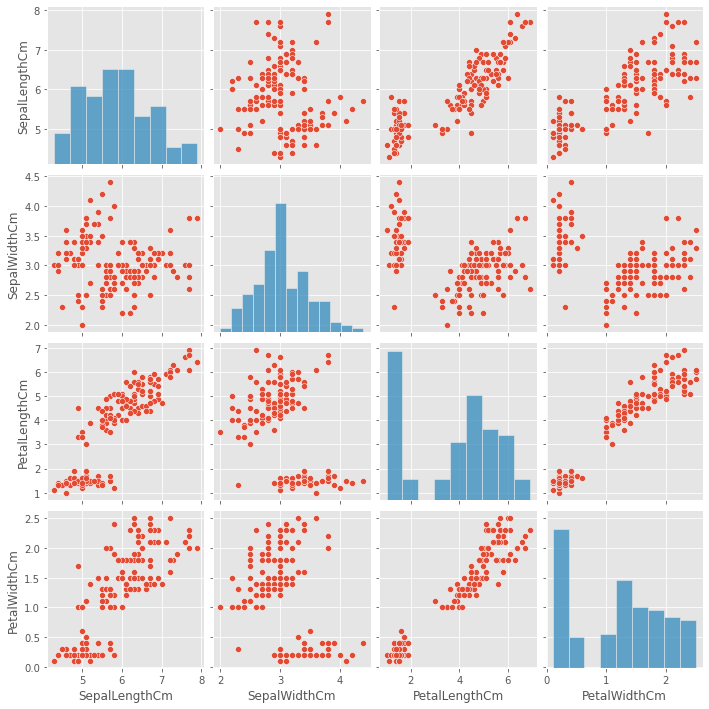

In [163]:
sns.pairplot(iris)
plt.show()

### Task 4: Standardize the Data
---

In [164]:
sp.stats.zscore( iris.loc[:, iris.columns != "Species"] )

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [165]:
iris_std = iris.loc[:, iris.columns != "Species"].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
iris_std

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593
3,-1.501490,0.106090,-1.280118,-1.308593
4,-1.018437,1.259242,-1.336794,-1.308593
...,...,...,...,...
145,1.034539,-0.124540,0.816888,1.443121
146,0.551486,-1.277692,0.703536,0.918985
147,0.793012,-0.124540,0.816888,1.050019
148,0.430722,0.797981,0.930239,1.443121


### Task 5: Compute the Eigenvectors and Eigenvalues
---

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $Σ = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

In [166]:
iris_cov = iris_std.cov()
iris_cov

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [167]:
eig_values, eig_vectors = np.linalg.eig(iris_cov)
print("Eigen Values:", eig_values, sep="\n", end="\n\n")
print("Eigen Vectors:", eig_vectors, sep="\n")

Eigen Values:
[2.91081808 0.92122093 0.14735328 0.02060771]

Eigen Vectors:
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


We can prove this by looking at the covariance matrix. It has the property that it is symmetric. We also constrain the each of the columns (eigenvectors) such that the values sum to one. Thus, they are orthonormal to each other.

Eigendecomposition of the covriance matrix:  $Σ = W\wedge W^{-1}$

In [168]:
eig_vectors.dot(np.diag(eig_values).dot(np.linalg.inv(eig_vectors)))

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

### Task 6: Singular Value Decomposition (SVD)
---

In [169]:
u, s, vh = np.linalg.svd(iris_std.T, full_matrices=True)
print("u:",  u, sep="\n", end="\n\n")
print("s:",  s, sep="\n", end="\n\n")
print("vh:", vh, sep="\n", end="\n\n")

u:
[[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]

s:
[20.82575075 11.71588318  4.68568442  1.75229803]

vh:
[[ 1.08374515e-01  9.98503796e-02  1.13323362e-01 ... -7.27833114e-02
  -6.58701606e-02 -4.59092965e-02]
 [-4.30198387e-02  5.57547718e-02  2.70926177e-02 ... -2.26960075e-02
  -8.64611208e-02  1.89567788e-03]
 [ 2.59377669e-02  4.83370288e-02 -1.09498919e-02 ... -3.81328738e-02
  -1.98113038e-01 -1.12476331e-01]
 ...
 [ 5.42576376e-02  5.32189412e-03  2.76010922e-02 ...  9.89545817e-01
  -1.40226565e-02 -7.86338250e-04]
 [ 1.60581494e-03  8.56651825e-02  1.78415121e-01 ... -1.24233079e-02
   9.52228601e-01 -2.19591161e-02]
 [ 2.27770498e-03  6.44405862e-03  1.49430370e-01 ... -6.58105858e-04
  -2.32385318e-02  9.77215825e-01]]



### Task 7: Picking Principal Components Using the Explained Variance
---

In [170]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(iris_std.iloc[:, :])

iris_pca = pd.DataFrame(data = X, columns = ['PCA1', 'PCA2'])
iris_pca

,PCA1,PCA2
0,-2.256981,0.504015
1,-2.079459,-0.653216
2,-2.360044,-0.317414
3,-2.296504,-0.573447
4,-2.380802,0.672514
...,...,...
145,1.864277,0.381544
146,1.553288,-0.902291
147,1.515767,0.265904
148,1.371796,1.012968


### Task 8: Project Data Onto Lower-Dimensional Linear Subspace
---

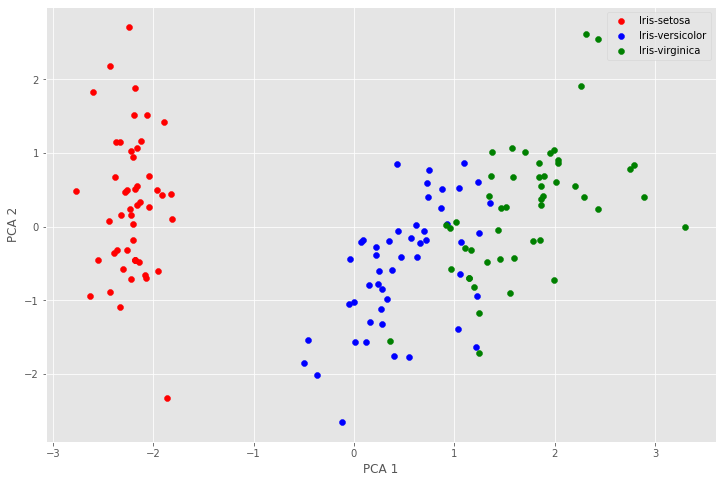

In [171]:
color = ['red', 'blue', 'green']
Species = iris["Species"].unique()
for i in range(len(Species)):
    x = iris_pca[iris['Species'] == Species[i]]
    plt.scatter(x['PCA1'], x['PCA2'], c = color[i], label = Species[i])

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()